In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data1 = pd.read_csv("news_summary.csv", encoding='iso-8859-1')
data2 = pd.read_csv("news_summary_more.csv", encoding='iso-8859-1')

In [15]:
pre1 = data1.iloc[:, 0:6].copy()
pre2 = data2.iloc[:, 0:2].copy()

# To increase the intake of possible text values to build a reliable model
pre1['text'] = pre1['author'].str.cat(pre1['date'
        ].str.cat(pre1['read_more'].str.cat(pre1['text'
        ].str.cat(pre1['ctext'], sep=' '), sep=' '), sep=' '), sep=' ')

data = pd.DataFrame()
data['text'] = pd.concat([pre1['text'], pre2['text']], ignore_index=True)
data['summary'] = pd.concat([pre1['headlines'], pre2['headlines']],
                           ignore_index=True)

In [16]:
import re

# Remove non-alphabetic characters (Data Cleaning)
def text_strip(column):

    for row in column:
        row = re.sub("(\\t)", " ", str(row)).lower()
        row = re.sub("(\\r)", " ", str(row)).lower()
        row = re.sub("(\\n)", " ", str(row)).lower()

        # Remove _ if it occurs more than one time consecutively
        row = re.sub("(__+)", " ", str(row)).lower()

        # Remove - if it occurs more than one time consecutively
        row = re.sub("(--+)", " ", str(row)).lower()

        # Remove ~ if it occurs more than one time consecutively
        row = re.sub("(~~+)", " ", str(row)).lower()

        # Remove + if it occurs more than one time consecutively
        row = re.sub("(\+\++)", " ", str(row)).lower()

        # Remove . if it occurs more than one time consecutively
        row = re.sub("(\.\.+)", " ", str(row)).lower()

        # Remove the characters - <>()|&©ø"',;?~*!
        row = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", " ", str(row)).lower()

        # Remove mailto:
        row = re.sub("(mailto:)", " ", str(row)).lower()

        # Remove \x9* in text
        row = re.sub(r"(\\x9\d)", " ", str(row)).lower()

        # Replace INC nums to INC_NUM
        row = re.sub("([iI][nN][cC]\d+)", "INC_NUM", str(row)).lower()

        # Replace CM# and CHG# to CM_NUM
        row = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", "CM_NUM", str(row)).lower()

        # Remove punctuations at the end of a word
        row = re.sub("(\.\s+)", " ", str(row)).lower()
        row = re.sub("(\-\s+)", " ", str(row)).lower()
        row = re.sub("(\:\s+)", " ", str(row)).lower()

        # Replace any url to only the domain name
        try:
            url = re.search(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", str(row))
            repl_url = url.group(3)
            row = re.sub(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", repl_url, str(row))
        except:
            pass

        # Remove multiple spaces
        row = re.sub("(\s+)", " ", str(row)).lower()

        # Remove the single character hanging between any two spaces
        row = re.sub("(\s+.\s+)", " ", str(row)).lower()

        yield row

In [17]:
processed_text = text_strip(data['text'])
processed_summary = text_strip(data['summary'])

In [18]:
import spacy
from time import time

nlp = spacy.load('en', disable=['ner', 'parser']) 

# Process text as batches and yield Doc objects in order
text = [str(doc) for doc in nlp.pipe(processed_text, batch_size=5000)]

summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(processed_summary, batch_size=5000)]

In [19]:
text[0]

'chhavi tyagi 03 aug 2017 thursday www.hindustantimes.com utm_source=inshorts utm_medium=referral utm_campaign=fullarticle the administration of union territory daman and diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of rakshabandhan on august the administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media the daman and diu administration on wednesday withdrew circular that asked women staff to tie rakhis on male colleagues after the order triggered backlash from employees and was ripped apart on social media.the union territory administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate rakshabandhan at workplace it has been decided to celebrate the festival of rakshabandhan on august in this connection all offices/ departments shall remain open and c

In [20]:
summary[0]

'_START_ daman diu revokes mandatory rakshabandhan in offices order _END_'

In [21]:
data = data[data['text'].notna()]
data

,text,summary
0,"Chhavi Tyagi 03 Aug 2017,Thursday http://www.h...",Daman & Diu revokes mandatory Rakshabandhan in...
1,"Daisy Mowke 03 Aug 2017,Thursday http://www.hi...",Malaika slams user who trolled her for 'divorc...
2,"Arshiya Chopra 03 Aug 2017,Thursday http://www...",'Virgin' now corrected to 'Unmarried' in IGIMS...
3,"Sumedha Sehra 03 Aug 2017,Thursday http://indi...",Aaj aapne pakad liya: LeT man Dujana before be...
4,"Aarushi Maheshwari 03 Aug 2017,Thursday http:/...",Hotel staff to get training to spot signs of s...
...,...,...
102910,A CRPF jawan was on Tuesday axed to death with...,CRPF jawan axed to death by Maoists in Chhatti...
102911,"'Uff Yeh', the first song from the Sonakshi Si...",First song from Sonakshi Sinha's 'Noor' titled...
102912,"According to reports, a new version of the 199...",'The Matrix' film to get a reboot: Reports
102913,A new music video shows rapper Snoop Dogg aimi...,Snoop Dogg aims gun at clown dressed as Trump ...


In [22]:
data['cleaned_text'] = pd.Series(text)
data['cleaned_summary'] = pd.Series(summary)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


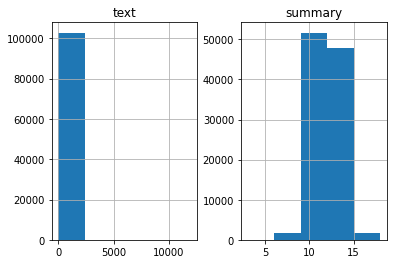

In [23]:
import matplotlib.pyplot as plt

text_count = []
summary_count = []

for sent in data['cleaned_text']:
    text_count.append(len(sent.split()))
    
for sent in data['cleaned_summary']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame() 

graph_df['text'] = text_count
graph_df['summary'] = summary_count

graph_df.hist(bins = 5)
plt.show()

In [24]:

cnt = 0
for i in data['cleaned_text']:
    if len(i.split()) <= 62:
        cnt = cnt + 1
print(cnt / len(data['cleaned_text']))

0.9545901144975047


In [25]:

cnt = 0
for i in data['cleaned_summary']:
    if len(i.split()) <= 15:
        cnt = cnt + 1
print(cnt / len(data['cleaned_summary']))

0.9977723085304046


In [26]:
max_text_len = 62
max_summary_len = 15

In [27]:
# Select the Summaries and Text which fall below max length 

import numpy as np

cleaned_text = np.array(data['cleaned_text'])
cleaned_summary= np.array(data['cleaned_summary'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if len(cleaned_summary[i].split()) <= max_summary_len and len(cleaned_text[i].split()) <= max_text_len:
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_data = pd.DataFrame({'text': short_text,'summary': short_summary})

post_data.head()

,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg...,_START_ upgrad learner switches to career in m...
1,kunal shah credit card bill payment platform c...,_START_ delhi techie wins free food from swigg...
2,new zealand defeated india by wickets in the f...,_START_ new zealand end rohit sharma-led india...
3,with aegon life iterm insurance plan customers...,_START_ aegon life iterm insurance plan helps ...
4,speaking about the sexual harassment allegatio...,_START_ have known hirani for yrs what if meto...


In [28]:
# Add sostok and eostok

post_data['summary'] = post_data['summary'].apply(lambda x: 'sostok ' + x \
        + ' eostok')

post_data.head(2)

,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg...,sostok _START_ upgrad learner switches to care...
1,kunal shah credit card bill payment platform c...,sostok _START_ delhi techie wins free food fro...


In [29]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(
    np.array(post_data["text"]),
    np.array(post_data["summary"]),
    test_size=0.1,
    random_state=0,
    shuffle=True,
)

In [30]:
# Tokenize the text to get the vocab count 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [31]:
thresh = 5

cnt = 0
tot_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary: ", (cnt / tot_cnt) * 100)

% of rare words in vocabulary:  62.618722845306664


In [32]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

# Convert text sequences to integer sequences 
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

# Pad zero upto maximum length
x_tr = pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 29598


In [33]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

thresh = 5

cnt = 0
tot_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

# Convert text sequences to integer sequences 
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val) 

# Pad zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 62.6189990974992
Size of vocabulary in Y = 12841


In [34]:
# Remove empty Summaries, .i.e, which only have 'START' and 'END' tokens
ind = []

for i in range(len(y_tr)):
    cnt = 0
    for j in y_tr[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_tr = np.delete(y_tr, ind, axis=0)
x_tr = np.delete(x_tr, ind, axis=0)

In [35]:
# Remove empty Summaries, .i.e, which only have 'START' and 'END' tokens
ind = []
for i in range(len(y_val)):
    cnt = 0
    for j in y_val[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_val = np.delete(y_val, ind, axis=0)
x_val = np.delete(x_val, ind, axis=0)

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, \
    Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
latent_dim = 300
embedding_dim = 200

# Encoder
encoder_inputs = Input(shape=(max_text_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 62)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 62, 200)      5919600     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 62, 300),    601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [38]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [39]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [40]:
history = model.fit(
    [x_tr, y_tr[:, :-1]],
    y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
    epochs=50,
    callbacks=[es],
    batch_size=128,
    validation_data=([x_val, y_val[:, :-1]],
                     y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:
                     , 1:]),
    )

Epoch 1/50
689/689 [==============================] - 507s 718ms/step - loss: 5.1730 - val_loss: 4.8690
Epoch 2/50
689/689 [==============================] - 493s 715ms/step - loss: 4.7661 - val_loss: 4.5431
Epoch 3/50
689/689 [==============================] - 493s 716ms/step - loss: 4.4560 - val_loss: 4.2913
Epoch 4/50
689/689 [==============================] - 495s 718ms/step - loss: 4.2250 - val_loss: 4.1324
Epoch 5/50
689/689 [==============================] - 496s 720ms/step - loss: 4.0449 - val_loss: 3.9743
Epoch 6/50
689/689 [==============================] - 493s 715ms/step - loss: 3.9030 - val_loss: 3.8623
Epoch 7/50
689/689 [==============================] - 493s 715ms/step - loss: 3.7862 - val_loss: 3.7808
Epoch 8/50
689/689 [==============================] - 492s 714ms/step - loss: 3.6878 - val_loss: 3.7125
Epoch 9/50
689/689 [==============================] - 493s 715ms/step - loss: 3.6004 - val_loss: 3.6568
Epoch 10/50
689/689 [==============================] - 493s 716m

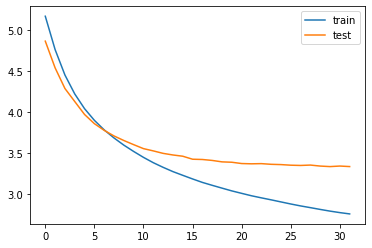

In [48]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [53]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

In [54]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
model.save('/content/drive/summ_model')

UnimplementedError: ignored

In [58]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_summary_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [59]:
# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['sostok'] and i \
            != target_word_index['eostok']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [60]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

for i in range(0, 19):
    print ('Review:', seq2text(x_tr[i]))
    print ('Original summary:', seq2summary(y_tr[i]))
    print ('Predicted summary:', decode_sequence(x_tr[i].reshape(1,
           max_text_len)))
    print('\n')

Review: ravichandran ashwin has bowled 430 balls in the 2016 17 season most by any bowler in test cricket season ashwin and ravindra jadeja who bowled 304 balls this season went past anil kumble record of balls 2004 05 season ashwin played 13 tests in the season taking 82 wickets 15 more than the combined tally of the four indian pacers 
Original summary: start ashwin bowled 430 balls this season end 
Predicted summary:  start ashwin scores highest ever score in test history end


Review: the cbi has registered case against former uco bank cmd arun kaul two private companies managing directors and others over ã¢ââ¹621 crore fraud it was alleged that kaul and others entered into criminal conspiracy and defrauded uco bank of ã¢ââ¹621 crore by diverting and siphoning off the bank loans the irregularities occurred when kaul was the uco bank cmd 
Original summary: start cbi books former bank cmd over crore fraud end 
Predicted summary:  start cbi books ex bank of ã¢ââ¹2 lakh crore fraud 

In [63]:
from tensorflow import keras
model = keras.models.load_model('/model')

In [64]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 62)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 62, 200)      5919600     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 62, 300),    601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [66]:
model.predict([1, 2, 3, 4])

ValueError: ignored